# Exercises on Basic Visualisations in R
* Author: Johannes Maucher
* Last Update: 13.09.2017, a few modifications by OK in 2019
* Corresponding lecture notebook: [04Visualisation](../01Basics/04Visualisation.ipynb)

## Solve the tasks ...

Your solution should contain 
* the implemented code in code-cells, 
* the output of this code
* answers on questions in mark-down cells
* and optionally your remarks, discussion, comments on the solution in markdown-cells.

Send me the resulting Jupyter notebook.

## Tasks
1. Read data from [Bank Marketing .csv file](../data/Bank-Marketing.csv) from [UCI Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). In order to configure the arguments of [`read.csv()`](https://stat.ethz.ch/R-manual/R-devel/library/utils/html/read.table.html), first the file should be inspected in a text-editor. As described in [UCI Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing): The data set contains data from a direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed - this is column 'y' in the data set. 

    Additionally how many missing values are included. Remove them all.  



In [1]:
library(tidyverse)
BMARK <- read.csv(file="../data/Bank-Marketing.csv", header=TRUE, 
                       sep=";",na.strings=c("unknown",""))
head(BMARK,n=5)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NA,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,NA,3,jun,199,4,-1,0,NA,no
59,blue-collar,married,secondary,no,0,yes,no,NA,5,may,226,1,-1,0,NA,no


In [2]:
message("The total number of NAs is: ", sum(is.na(BMARK)))
message("The total number of NAs per column: ")
colSums(is.na(BMARK))

message("Filtered: ")
BMARK <- BMARK[complete.cases(BMARK), ]
head(BMARK,n=5)

The total number of NAs is: 5259
The total number of NAs per column: 


age       job   marital education   default   balance   housing      loan 
        0        38         0       188         0         3         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
     1324         1         0         0         0         0         0      3705 
        y 
        0

Filtered: 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
10,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
15,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
18,37,admin.,single,tertiary,no,2317,yes,no,cellular,20,apr,114,1,152,2,failure,no


2. Calculate summary statistics of the imported `BMARK.data` (Bank Marketing .csv file). What is the mean value of the average yearly balance in euros ('balance') rounded to 2 decimal digits ?


In [3]:
summary(BMARK,digits=6)

      age                   job          marital        education   default  
 Min.   :20.0000   management :176   divorced: 80   primary  : 97   no :756  
 1st Qu.:33.0000   blue-collar:143   married :454   secondary:406   yes:  5  
 Median :38.0000   technician :137   single  :227   tertiary :258            
 Mean   :41.3062   admin.     :102                                           
 3rd Qu.:48.0000   services   : 57                                           
 Max.   :86.0000   retired    : 44                                           
                   (Other)    :102                                           
    balance         housing    loan          contact         day         
 Min.   :-1400.00   no :273   no :669   cellular :694   Min.   : 1.0000  
 1st Qu.:  142.00   yes:488   yes: 92   telephone: 67   1st Qu.: 8.0000  
 Median :  625.00                                       Median :14.0000  
 Mean   : 1605.18                                       Mean   :14.5848  
 3rd Q

In [4]:
message("The mean value of the average yearly balance in euros ('balance') rounded to 2 decimal digits is ",1605.18)

The mean value of the average yearly balance in euros ('balance') rounded to 2 decimal digits is 1605.18


In [5]:
BMARK_NUM

ERROR: Error in eval(expr, envir, enclos): object 'BMARK_NUM' not found


3. Detect per code the numeric columns and plot a histogram of all the columns and their values. The set of all histograms shall be arranged in a grid with two columns. Configure the graphical parameter such that the histograms are well aranged. In each histogram the title shall contain the parameter-name. Then the label for the x-axis can be ommitted. Plot each histogram in a different color from an arbitrary *Brewer*-color-palette. 

    Do that in R Basic graphics and modern ggplot2.


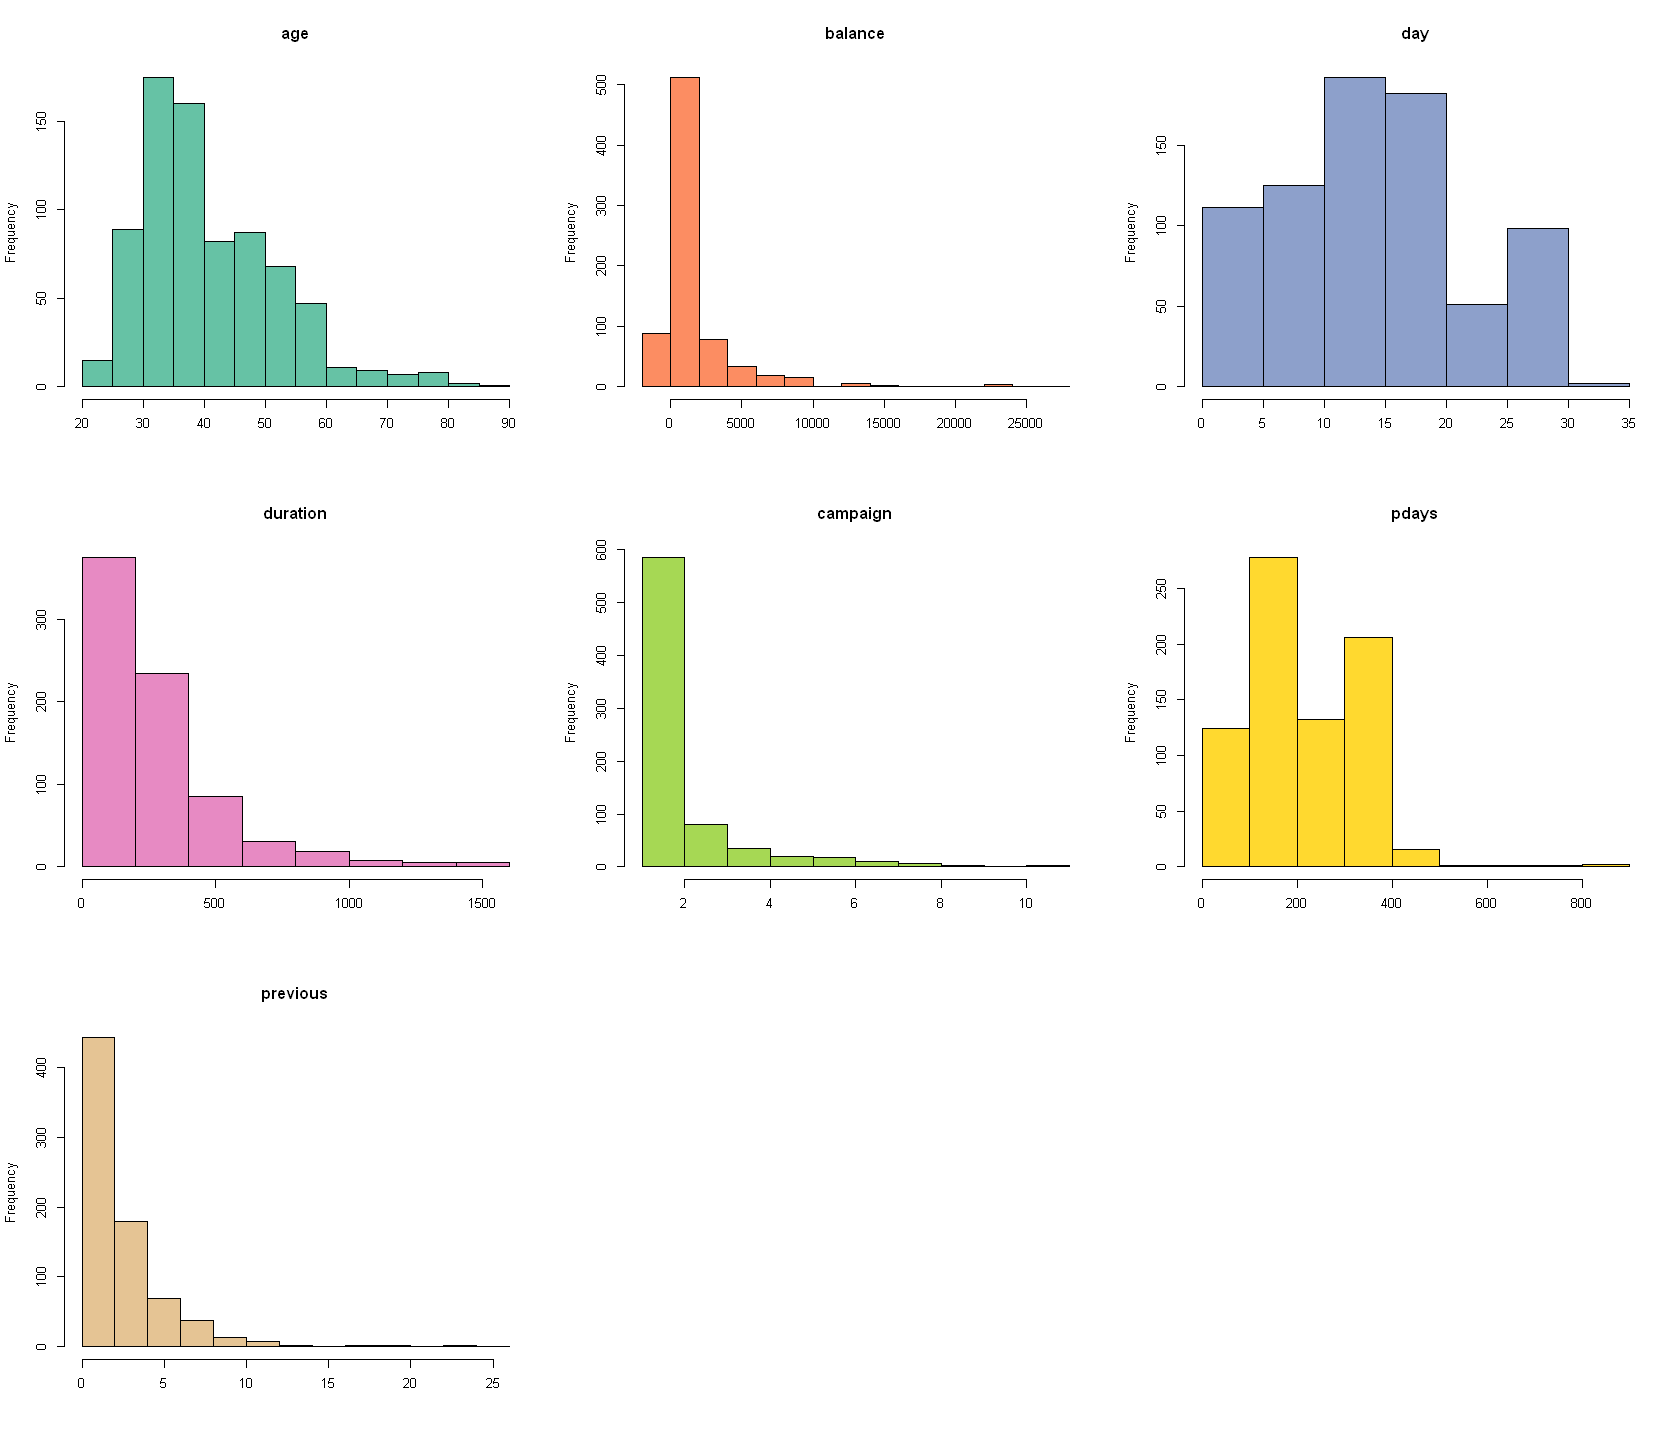

In [7]:
library(RColorBrewer)
options(repr.plot.res = 120, repr.plot.height=12, repr.plot.width=14)
BMARK_NUM <- BMARK[,unlist(lapply(BMARK, is.numeric))]
col=brewer.pal(7,"Set2")
par(mfrow = c(3,3)) 
for (i in 1:7) {
    x <- BMARK_NUM[,i]
    hist(x,main =colnames(BMARK_NUM)[i], xlab = NULL,col=col[i],breaks=10)
}

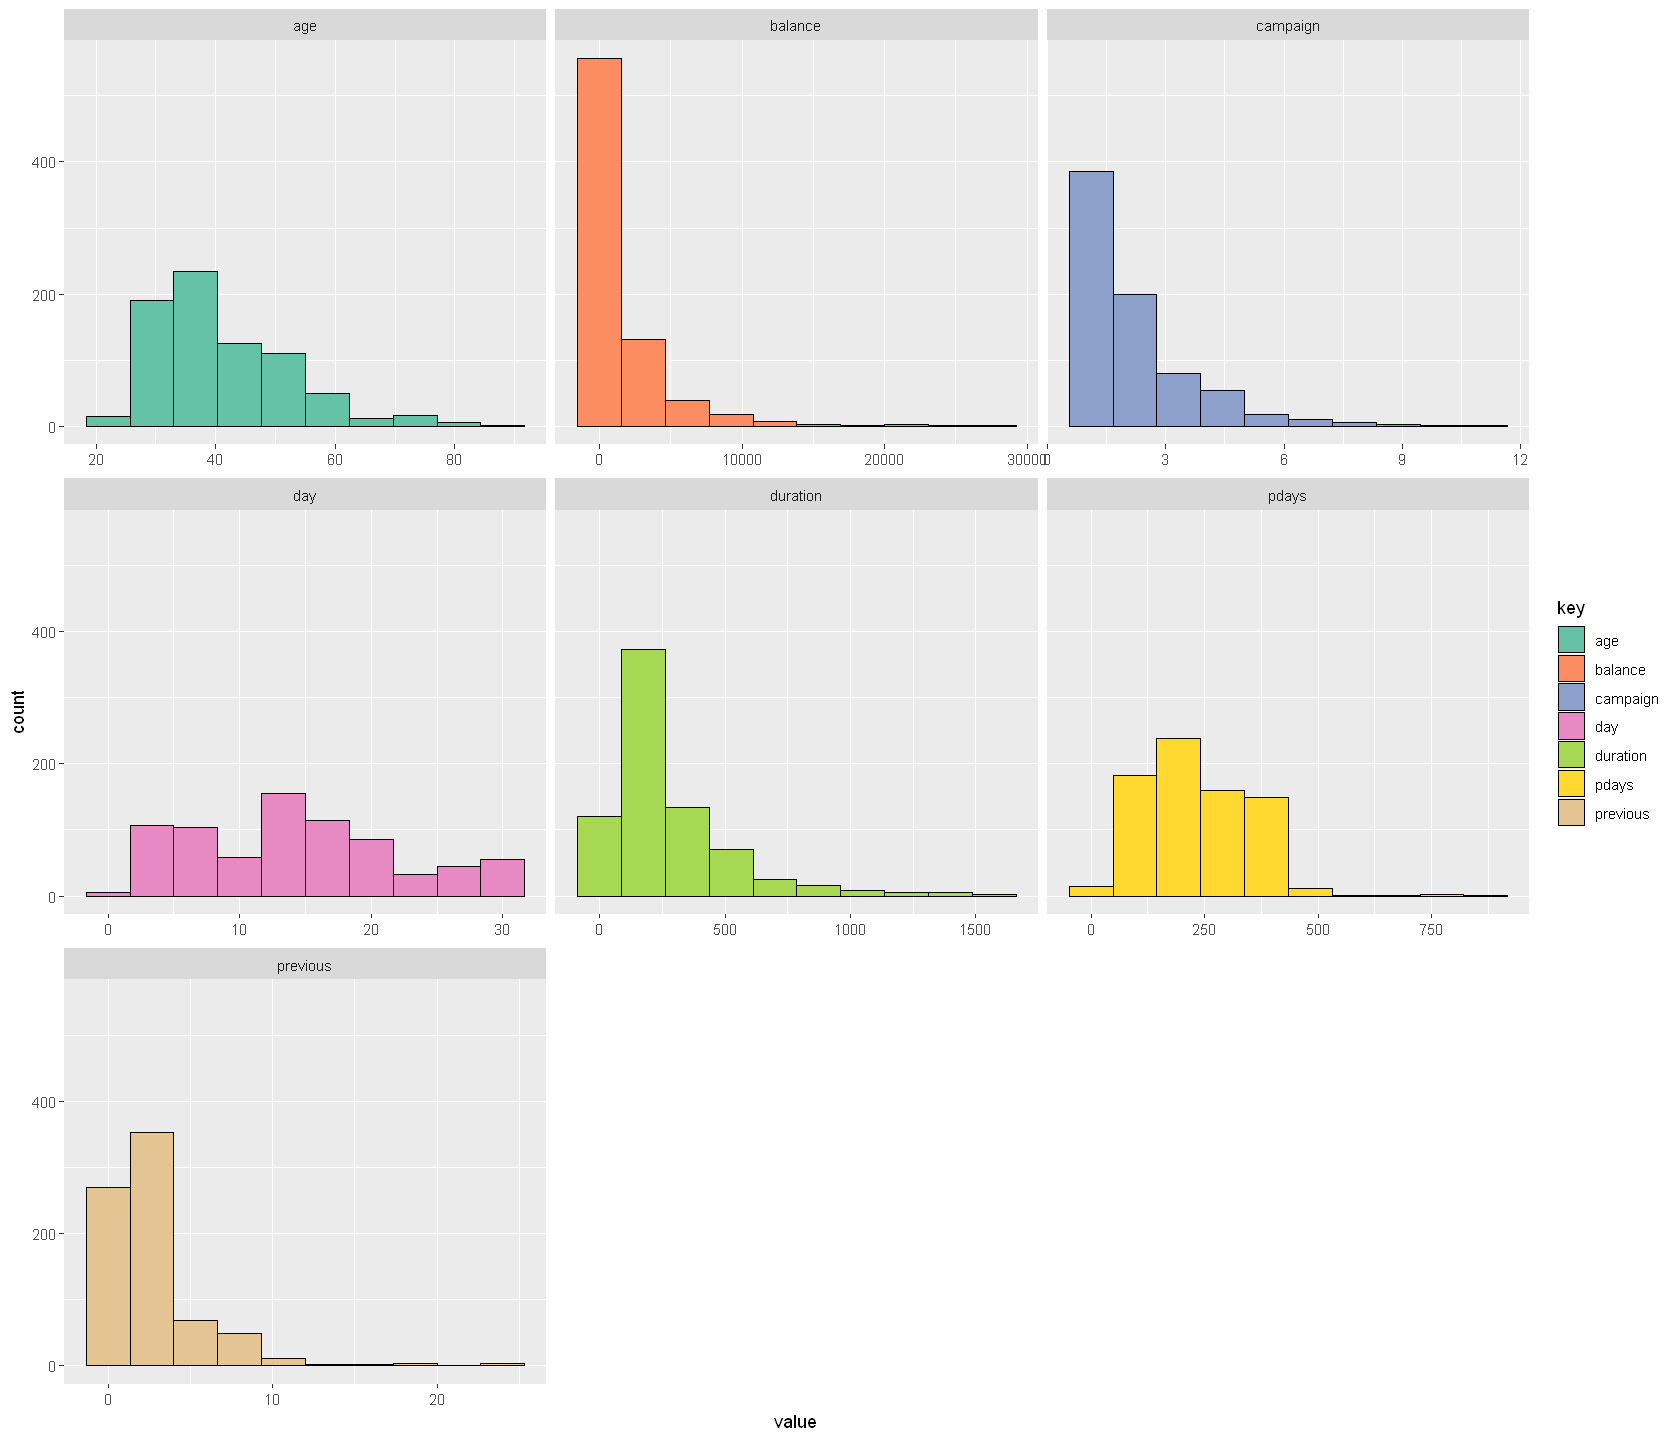

In [8]:
library(ggplot2)
ggplot(gather(BMARK_NUM), aes(value,fill=key)) + 
    scale_fill_brewer(palette = "Set2")+
    geom_histogram(bins = 10,color="black") + 
    facet_wrap(~key, scales = 'free_x')

4. Find a plot, which allows a fast visual investigation of correlations between parameters. Generate such a visualisation in order to analyse the correlation between

    1. 'pdays' and 'previous'
    2. 'campaign' and 'day'
    3. 'pdays' and 'day'
        
  Which parameter pairs correlate and how?


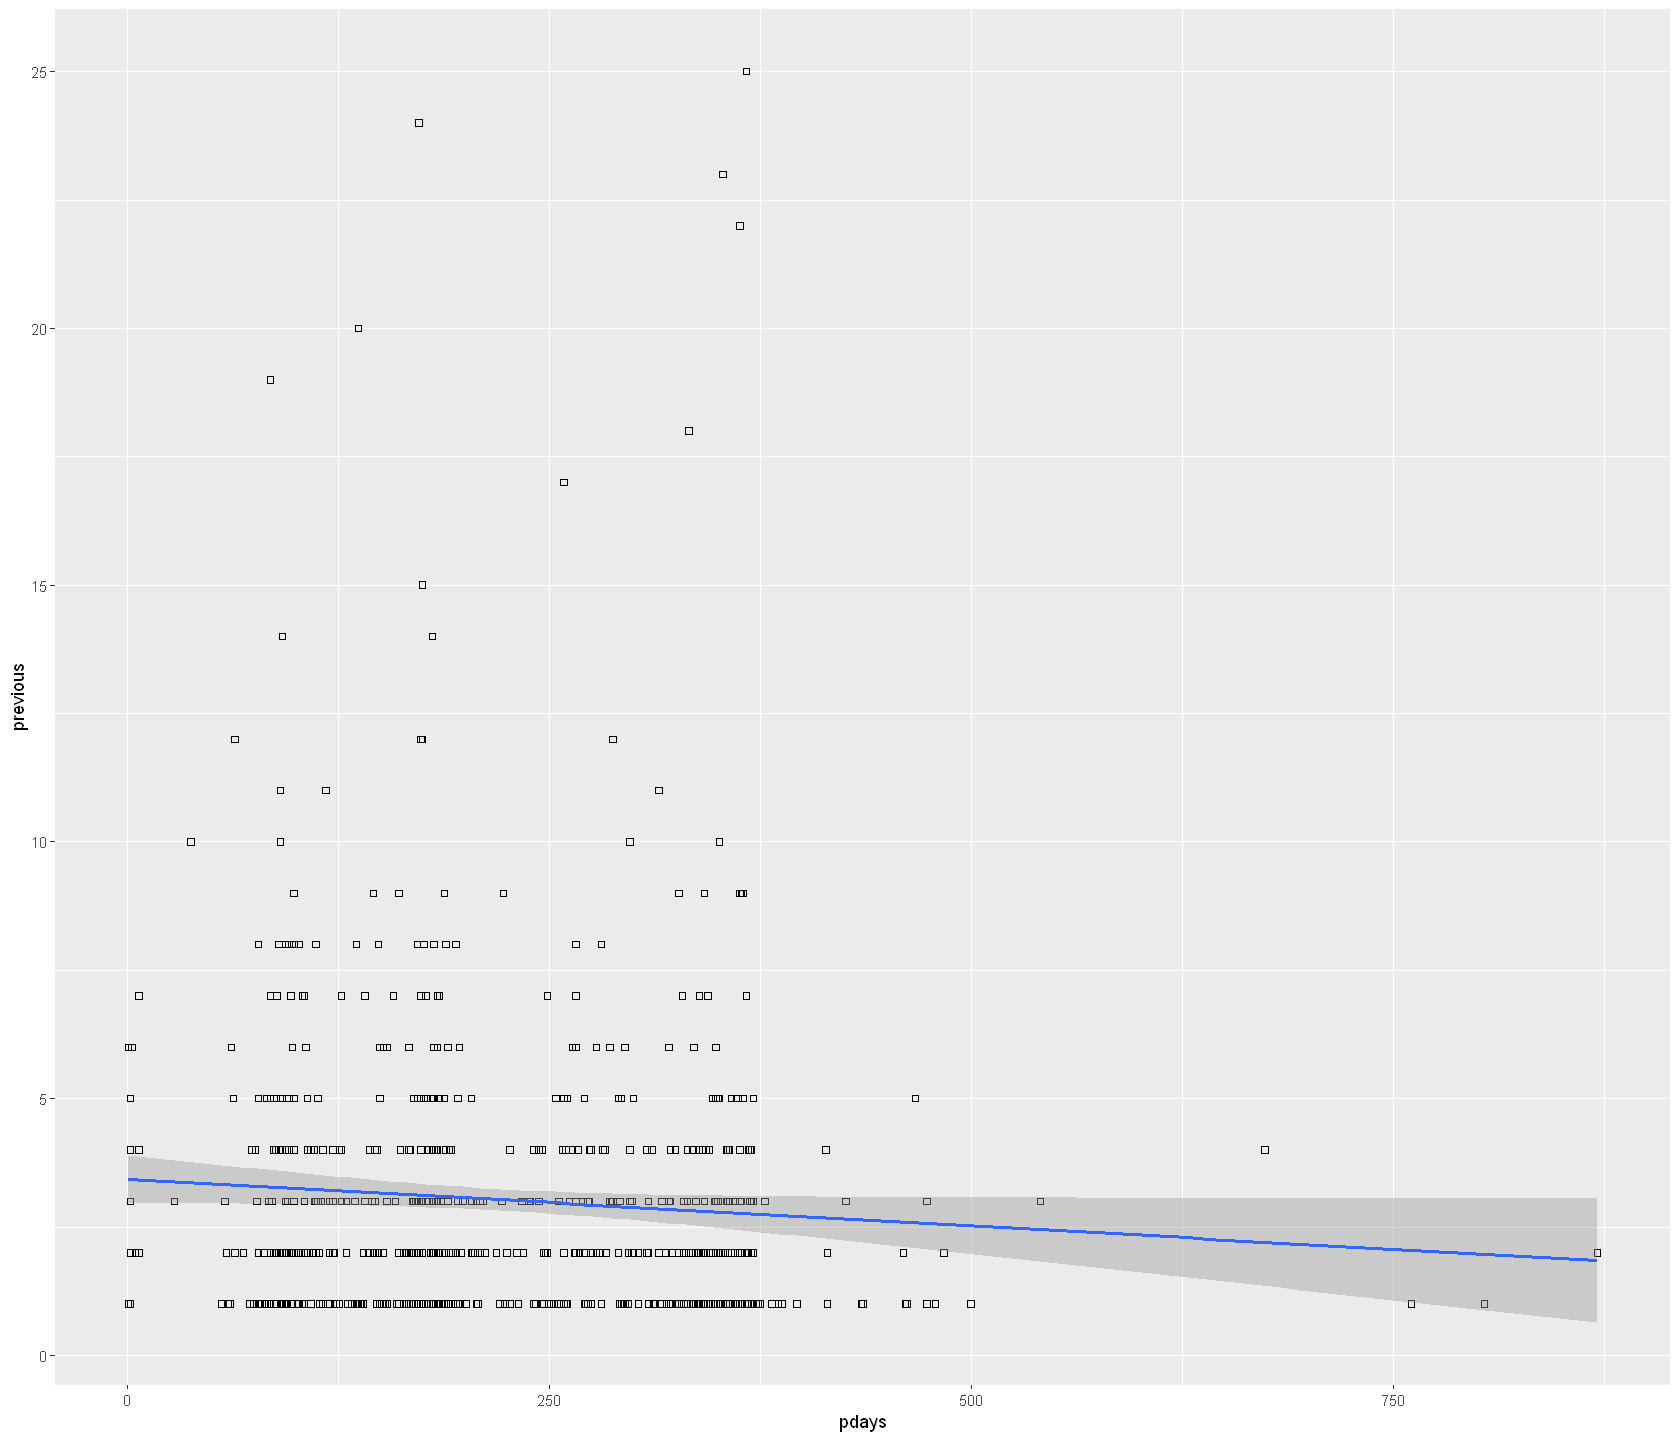

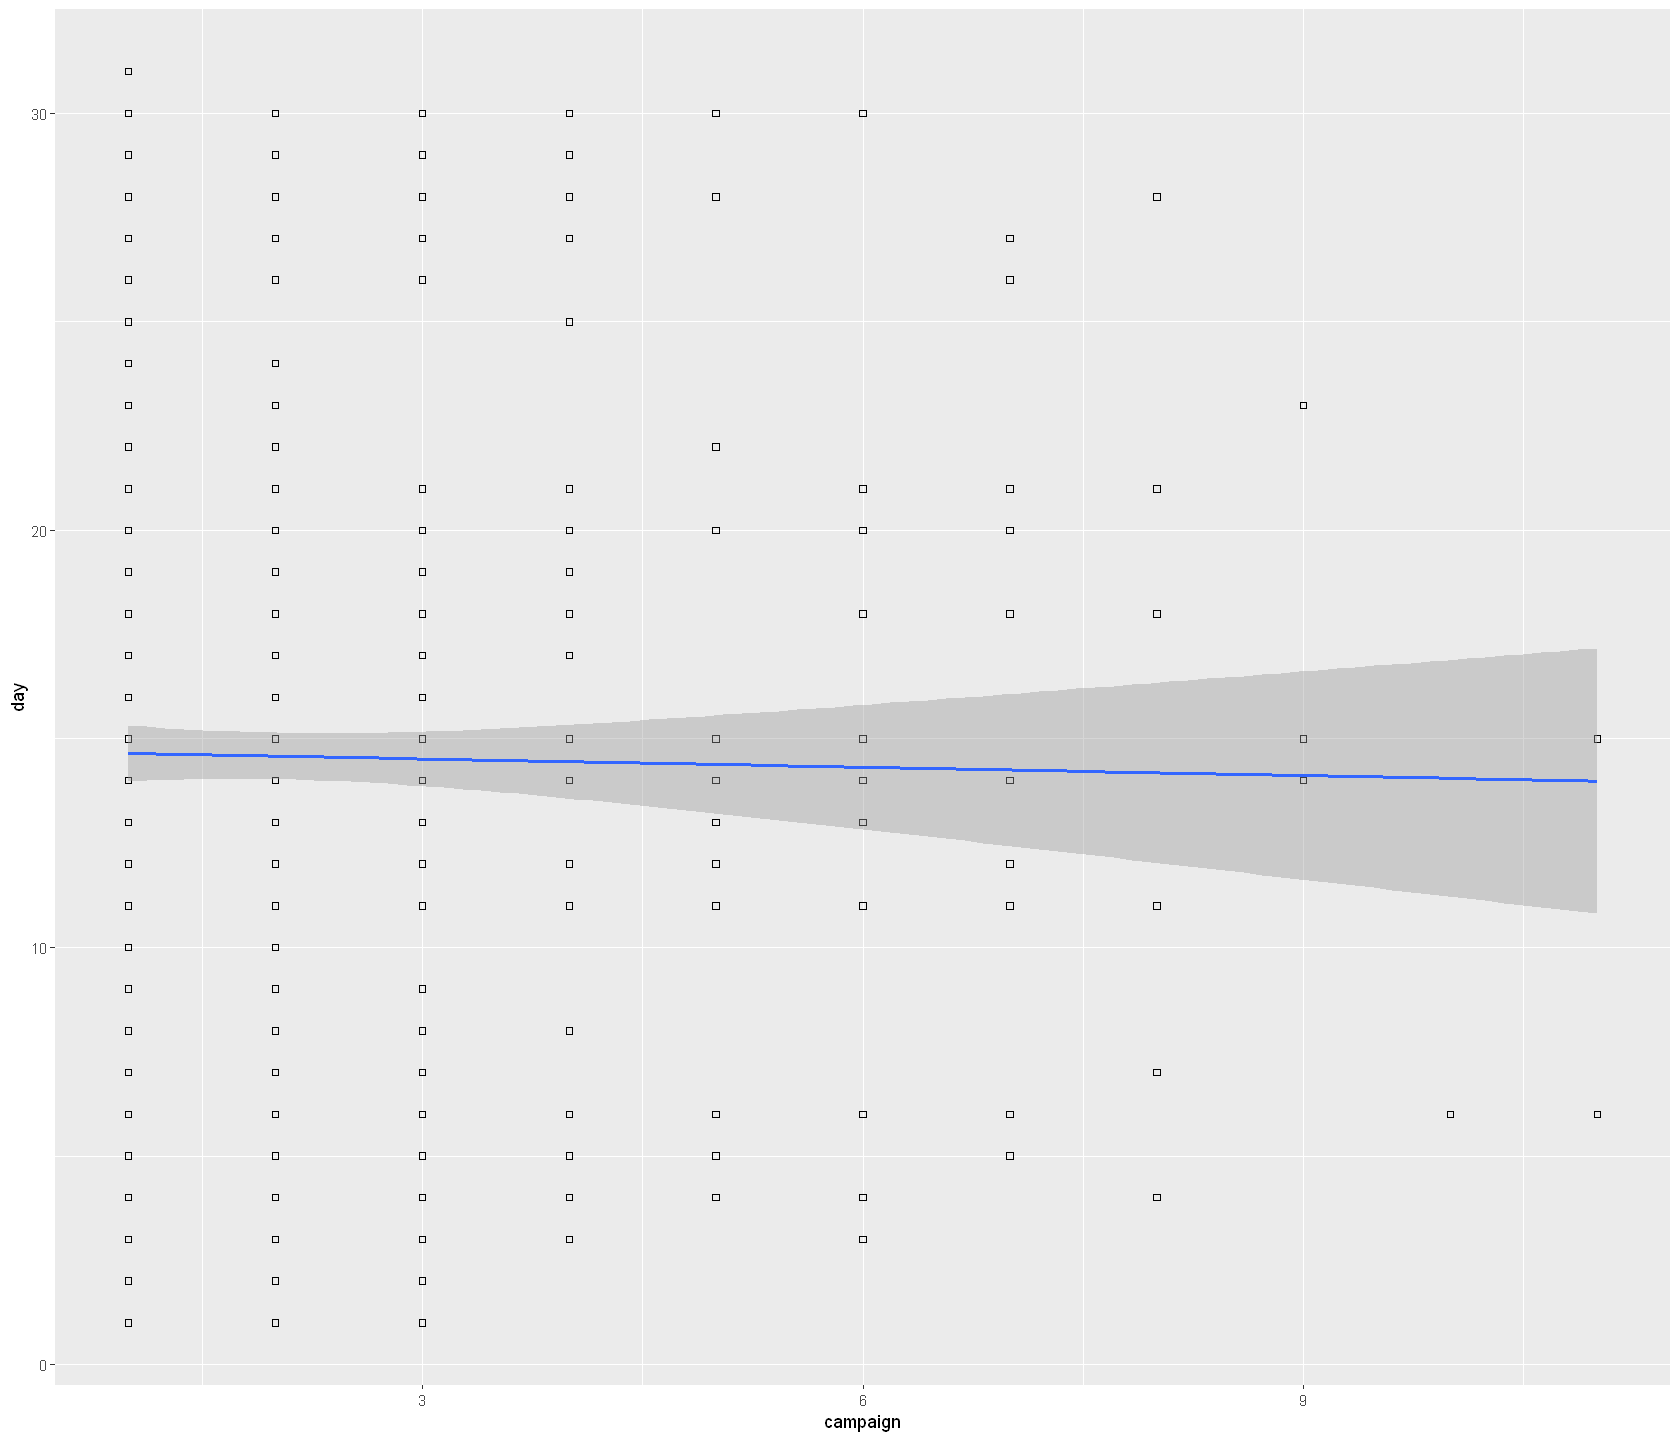

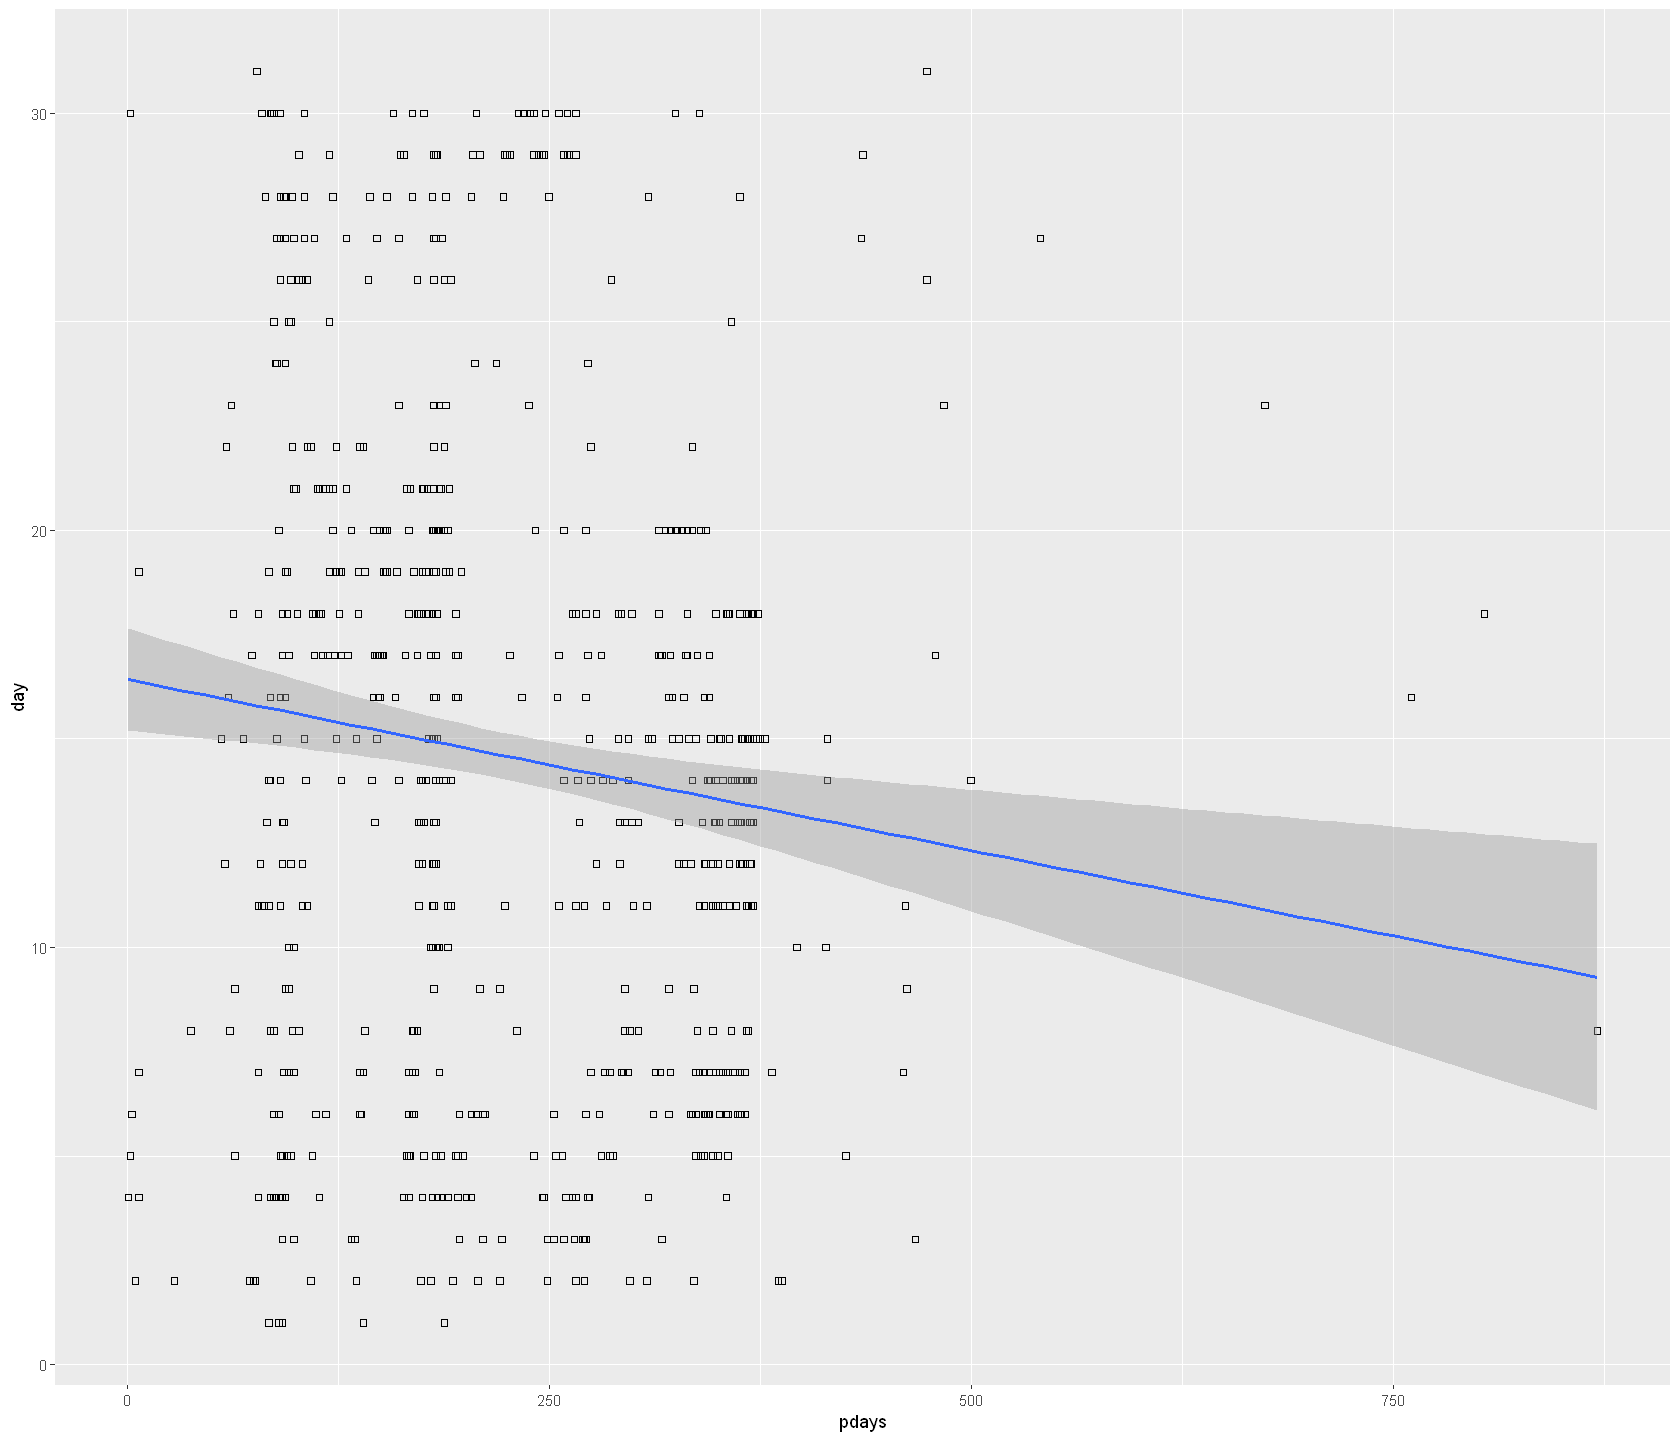

In [9]:
ggplot(BMARK_NUM, aes(x=pdays, y=previous)) +
    geom_point(shape=0.5) +  
    geom_smooth(method=lm)
ggplot(BMARK_NUM, aes(x=campaign, y=day)) +
    geom_point(shape=0.5) +  
    geom_smooth(method=lm)
ggplot(BMARK_NUM, aes(x=pdays, y=day)) +
    geom_point(shape=0.5) +  
    geom_smooth(method=lm)

5. Read data from [HRV data .csv file](../data/spikeeHRVjm.csv). This file contains short-time ECG-recordings of a person (so called *time-series data*). The columns of the file contain different HRV-parameters (Heart Rate Variability). These parameters indicate the state of the Autonomic Nervous System (ANS) and can be interpreted as markers for physical fitness. 

    The code `ma <- function(x, n=5){ return(stats::filter(x, rep(1/n,n), sides=2))}` implements a *moving average filter* of length $n=5$. Apply this function to the RMSSD time-series data and plot the smoothed data over the ID. Repeat this experiment for filter lengths of $n=11$ and $n=21$.

In [297]:
HRV <- read.csv(file="../data/spikeeHRVjm.csv", header=TRUE, 
                       sep=";",na.strings=c("unknown",""))
ma <- function(x, n=5){ return(stats::filter(x, rep(1/n,n), sides=2))}
HRV<-head(HRV,n=500)

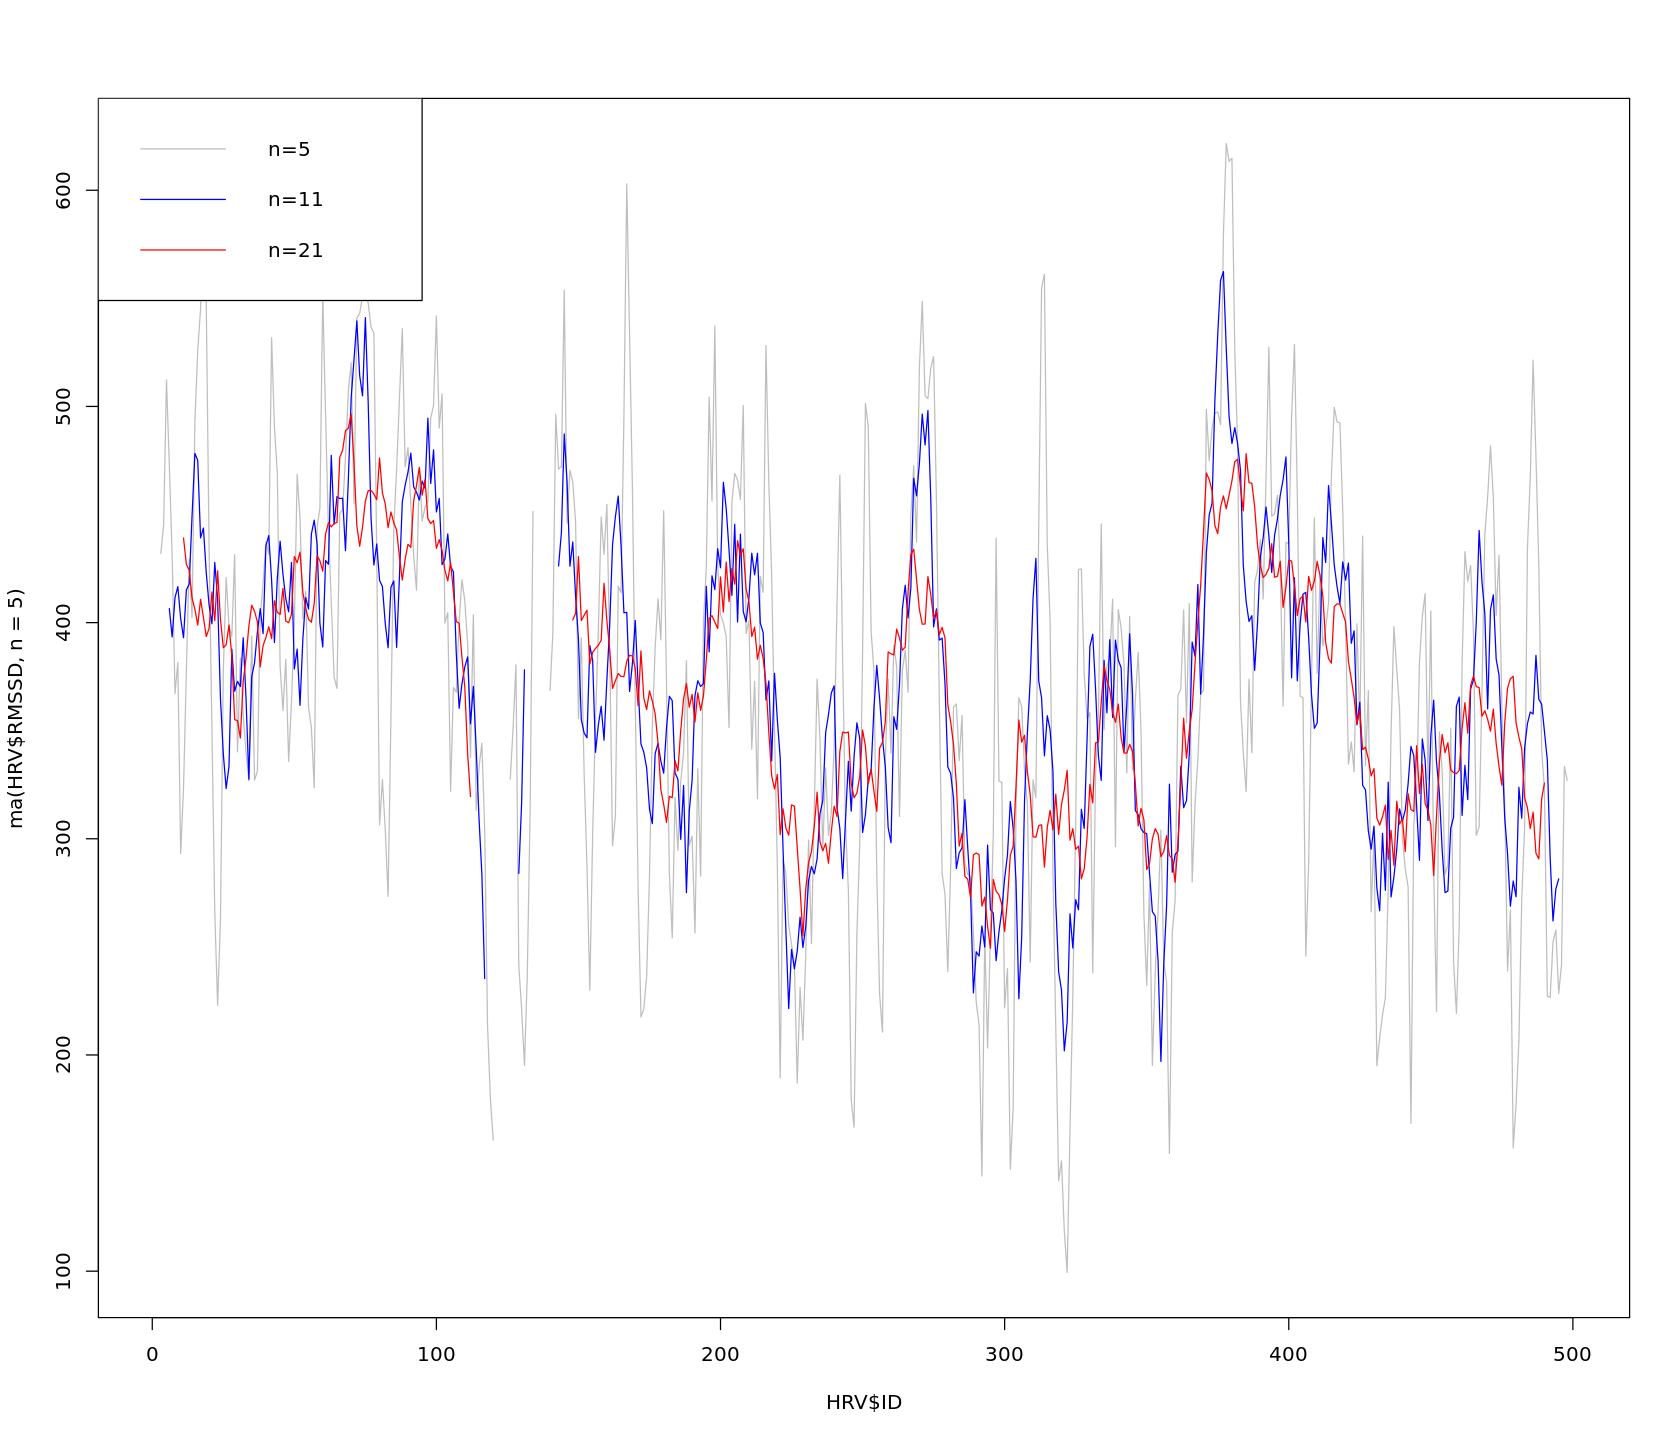

In [298]:
opar <- par(no.readonly=TRUE)


plot(HRV$ID,ma(HRV$RMSSD,n=5), type="l", pch=1, lty=1, col="gray") #plot with modified parameters
lines(HRV$ID,ma(HRV$RMSSD,n=11), type="l", pch=1, lty=1, col="blue") #plot with modified parameters
lines(HRV$ID,ma(HRV$RMSSD,n=21), type="l", pch=1, lty=1, col="red")
legend('topleft', c('n=5','n=11','n=21'),col=c("gray","blue","red"), lty=c(1,1))
par(opar)